# Predicting Student Admissions with Neural Networks in Keras
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [1]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


## Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

In [21]:
X = np.array(data[["gre","gpa"]])
y = np.array(data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
print(rejected.shape)
#print(admitted)
for s in rejected:
 print("Rejected GRE ",s[0][0],"GPA ",s[0][1] )
 break
for s in admitted:
 print("Admitted GRE ",s[0][0],"GPA ",s[0][1] )
 break    

(273, 1, 2)
Rejected GRE  380.0 GPA  3.61
Admitted GRE  660.0 GPA  3.67


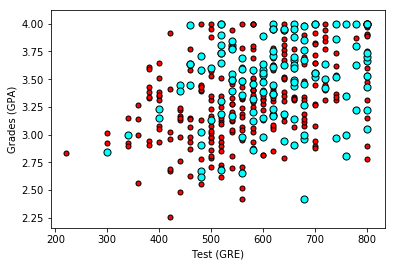

In [22]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 50, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

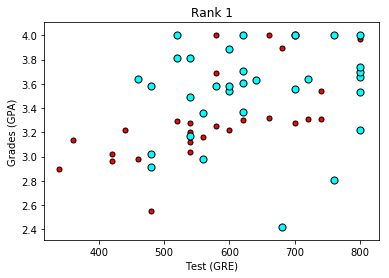

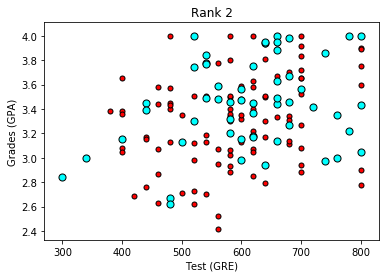

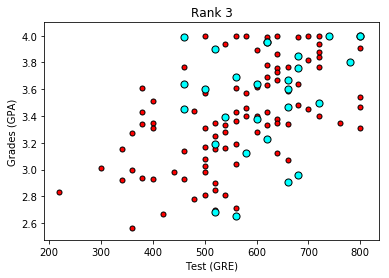

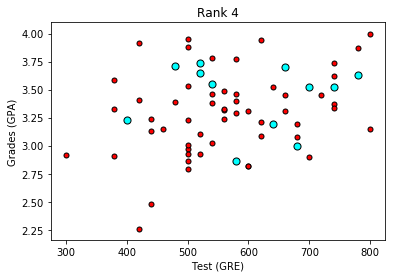

In [23]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

## One-hot encoding the rank
For this, we'll use the `get_dummies` function in numpy.

In [28]:
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)
one_hot_data = one_hot_data.drop('rank', axis=1)
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [29]:
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


## Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [30]:
# Copying our data
processed_data = one_hot_data[:]

# Scaling the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [38]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
print(processed_data.index)
print(sample)

RangeIndex(start=0, stop=400, step=1)
[ 76 323 304 158  66 284 182 101 371  93 288 399 171 203  88 179  48  32
 160 189 309  31 136 295 198 107 372 162 370   8 129 299  10  44  11 305
 159  28 118  37 326 255 382 194  97 187  30  13 141 217 251 348  58 241
 315 190 311 126  86 245 337 113 301 102 193 360  95 151 100 258 138 195
 221 385 332 121 380 365 124 243 103 172 366 116 214   4 285 237 163 328
 178 184 223 144 175 376 127 202 384  92 308 300  50 356 205 208  51 269
 357  70 115 279  29 362 256 343 142 135 349  57 353 324 157 355 122 207
 310 173 161 314  33 290 342 267 224 140 381 387  68 114 104  82 200  72
 369 110 392 145 364 152  19 378 120  22 340  25 294 181 219 334  24 325
 117   3 268  77 265 188 375 286 280   2 262 277  39 312   7 361 383 351
  60 319 234 150 270  41  27 275 213 345   6  91 215 386 218 119  71 239
 153  55   1 263  69 197 106 388  99 111 398  78 176 180 359  87 266 331
 393  53 232 293 390  81  18  21 350  67 283 143 211 133 287  40  64 112
 230 229 316 

In [39]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
309      0  0.550  0.7450       0       0       1       0
57       0  0.475  0.7350       0       0       1       0
145      0  0.475  0.8575       0       0       1       0
237      0  0.600  1.0000       0       1       0       0
326      0  0.850  0.8275       0       1       0       0
240      0  0.550  0.6900       0       1       0       0
53       1  0.850  0.8175       0       1       0       0
61       0  0.700  0.8300       0       0       0       1
393      1  0.775  0.9375       0       1       0       0
378      0  0.800  0.7800       0       0       1       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
4       0  0.650  0.7325       0       0       0       1
9       0  0.875  0.9800       0       1       0       0
10      0  1.000  1.0000       0       0       0       1
22      0  0.750  0.7050       0       0       0       1
34      0  

## Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

Also, in Keras, we need to one-hot encode the output. We'll do this with the `to_categorical function`.

In [41]:
import keras

# Separate data and one-hot encode the output
# Note: We're also turning the data into numpy arrays, in order to train the model in Keras
features = np.array(train_data.drop('admit', axis=1))
targets = np.array(keras.utils.to_categorical(train_data['admit'], 2))
features_test = np.array(test_data.drop('admit', axis=1))
targets_test = np.array(keras.utils.to_categorical(test_data['admit'], 2))

#print(features[:10])
#print(targets[:10])

print(features[:2], features.shape)
print(targets[:2], targets.shape)

[[ 0.55   0.745  0.     0.     1.     0.   ]
 [ 0.475  0.735  0.     0.     1.     0.   ]] (360, 6)
[[ 1.  0.]
 [ 1.  0.]] (360, 2)


## Defining the model architecture
Here's where we use Keras to build our neural network.

In [42]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(6,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 9,282.0
Trainable params: 9,282.0
Non-trainable params: 0.0
______________________________________________________

## Training the model

In [44]:
# Training the model
model.fit(features, targets, epochs=200, batch_size=100, verbose=1)

Epoch 1/200
360/360 [==============================] - 0s - loss: 0.5669 - acc: 0.7139     
Epoch 2/200
360/360 [==============================] - 0s - loss: 0.5549 - acc: 0.7194     
Epoch 3/200
360/360 [==============================] - 0s - loss: 0.5641 - acc: 0.7250     
Epoch 4/200
360/360 [==============================] - 0s - loss: 0.5693 - acc: 0.7167     
Epoch 5/200
360/360 [==============================] - 0s - loss: 0.5709 - acc: 0.7222     
Epoch 6/200
360/360 [==============================] - 0s - loss: 0.5695 - acc: 0.7194     

## Scoring the model

In [46]:
# Evaluating the model on the training and testing set
score = model.evaluate(features, targets)
print("\n Training Accuracy:", score)
score = model.evaluate(features_test, targets_test)
print("\n Testing Accuracy:", score[1])

 32/360 [=>............................] - ETA: 0s
 Training Accuracy: [0.55160301725069683, 0.72499999999999998]
32/40 [=======================>......] - ETA: 0s
 Testing Accuracy: 0.6


## Challenge: Play with the parameters!
You can see that we made several decisions in our training. For instance, the number of layers, the sizes of the layers, the number of epochs, etc.
It's your turn to play with parameters! Can you improve the accuracy? The following are other suggestions for these parameters. We'll learn the definitions later in the class:
- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam, ada